In [1]:
%run resources/library.py

# Notebook 3: Computing Convex Hulls Using `alphashape` - Part 2

## What is `alphashape`?

`alphashape` is a Python package that can be used to generate a convex hull.

## What is an $\alpha$ shape?

From [Wikipedia](https://en.wikipedia.org/wiki/Alpha_shape):
> *In computational geometry, an alpha shape, or α-shape, is a family of piecewise linear simple curves in the Euclidean plane associated with the shape of a finite set of points. They were first defined by Edelsbrunner, Kirkpatrick & Seidel (1983). The alpha-shape associated with a set of points is a generalization of the concept of the convex hull, i.e. every convex hull is an alpha-shape but not every alpha shape is a convex hull.*

## Load Cholera data

In [2]:
import pandas as pd

In [3]:
pumps_df = pd.read_csv('data/pumps.csv')

pumps_df

,FID,LON,LAT,Street
0,250,-0.136668,51.513341,Broadwick Street
1,251,-0.139586,51.513876,Kingly Street
2,252,-0.139671,51.514906,Ramillies Place
3,253,-0.131630,51.512354,Dean Street
4,254,-0.133594,51.512139,Rupert Street
5,255,-0.135919,51.511542,Bridle Lane
6,256,-0.133962,51.510019,Regent Street
7,257,-0.138199,51.511295,Warwick Street


In [4]:
deaths_df = pd.read_csv('data/cholera_deaths.csv')

deaths_df

,FID,DEATHS,LON,LAT
0,0,3,-0.137930,51.513418
1,1,2,-0.137883,51.513361
2,2,1,-0.137853,51.513317
3,3,1,-0.137812,51.513262
4,4,4,-0.137767,51.513204
...,...,...,...,...
245,245,3,-0.137108,51.514526
246,246,2,-0.137065,51.514706
247,247,1,-0.138474,51.512311
248,248,1,-0.138123,51.511998


## Create points lists from the pumps and deaths dataframes

In [5]:
import numpy as np

In [6]:
points_pumps = np.array([[lon,lat] for lat,lon in pumps_df[['LAT','LON']].values])

points_pumps

array([[-0.136668, 51.513341],
       [-0.139586, 51.513876],
       [-0.139671, 51.514906],
       [-0.13163 , 51.512354],
       [-0.133594, 51.512139],
       [-0.135919, 51.511542],
       [-0.133962, 51.510019],
       [-0.138199, 51.511295]])

In [7]:
points_deaths = np.array([[lon,lat] for lat,lon in deaths_df[['LAT','LON']].values])

points_deaths

array([[-0.13793 , 51.513418],
       [-0.137883, 51.513361],
       [-0.137853, 51.513317],
       [-0.137812, 51.513262],
       [-0.137767, 51.513204],
       [-0.137537, 51.513184],
       [-0.1382  , 51.513359],
       [-0.138045, 51.513328],
       [-0.138276, 51.513323],
       [-0.138223, 51.513427],
       [-0.138337, 51.513381],
       [-0.138563, 51.513462],
       [-0.138426, 51.513216],
       [-0.138378, 51.513169],
       [-0.138337, 51.513116],
       [-0.138645, 51.51324 ],
       [-0.138698, 51.513164],
       [-0.137924, 51.513178],
       [-0.137865, 51.513111],
       [-0.137811, 51.513055],
       [-0.138762, 51.513441],
       [-0.138799, 51.513592],
       [-0.139045, 51.513402],
       [-0.13897 , 51.51338 ],
       [-0.138863, 51.513411],
       [-0.138752, 51.513641],
       [-0.138808, 51.513693],
       [-0.138856, 51.513745],
       [-0.138887, 51.513676],
       [-0.139239, 51.51359 ],
       [-0.139321, 51.513663],
       [-0.139316, 51.513502],
       [

## Combine all the points to generate the alpha shape

In [8]:
points = np.concatenate((points_pumps, points_deaths), axis=0)

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

### Display all points

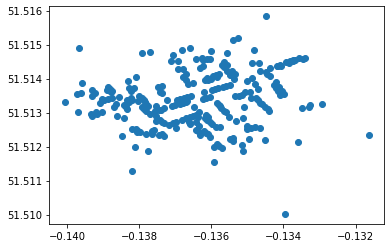

In [10]:
fig, ax = plt.subplots()
ax.scatter(*zip(*points))
plt.show()

## Generate the alpha shape using combined points

In [11]:
import alphashape

In [12]:
alpha_shape = alphashape.alphashape(points, 0.)

type(alpha_shape)

shapely.geometry.polygon.Polygon

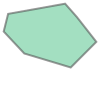

In [13]:
alpha_shape

In [14]:
from descartes import PolygonPatch

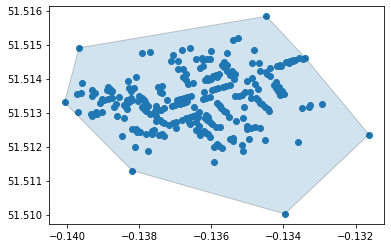

In [15]:
fig, ax = plt.subplots()
ax.scatter(*zip(*points))
ax.add_patch(PolygonPatch(alpha_shape, alpha=0.2))
plt.show()

## Use the Polygon `buffer()` function to expand the alpha shape boundary

In [16]:
alpha_shape = alphashape.alphashape(points, 2.0).buffer(0.002)

type(alpha_shape)

shapely.geometry.polygon.Polygon

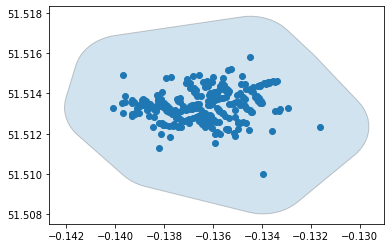

In [17]:
fig, ax = plt.subplots()
ax.scatter(*zip(*points))
ax.add_patch(PolygonPatch(alpha_shape, alpha=0.2))
plt.show()

## Plot the convex hull polygon generated using `alphashape`

The code below can be used to generate a Geopandas geodataframe to hold the convex hull geometry.

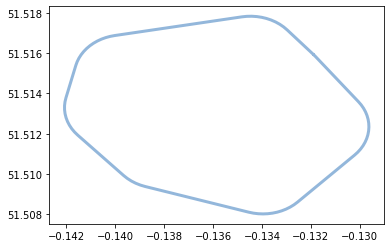

In [18]:
x,y = alpha_shape.exterior.xy

plt.plot(x, y, color='#6699cc', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)

## References

1. Alphashape Reference: https://github.com/bellockk/alphashape